# 라이브러리 호출

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False


# 로컬 컴퓨터에 저장되어 있는 경우 상위폴더에 dataset 폴더 형성 후 데이터를 집어 넣으면 됨
path = '../dataset/'

# 데이터 불러오기

In [2]:
# 로컬 컴퓨터에 저장되어 있는 경우

# data = pd.read_csv(path+'iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','target'])
# data

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/freejyb/fin_stats/main/dataset/iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 1. 스케일러 적용 후 PCA 시행

In [4]:
# 표준화 패키지 라이브러리 
from sklearn.preprocessing import StandardScaler

# feature, target 분류
feature = data.drop(['target'], axis=1).values 
target = data['target'].values 

# 스케일러 적용 후 저장
scale_feature = StandardScaler().fit_transform(feature)
scaled_data =pd.DataFrame(scale_feature, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
scaled_data.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
# PCA 기법 적용 (라이브러리)
from sklearn.decomposition import PCA

# 주성분을 몇개로 할지 결정 (2개 주성분)
pca = PCA(n_components=2)
pca2_feature = pca.fit_transform(scale_feature)

# 주성분으로 이루어진 데이터 프레임 구성
pca2_data = pd.DataFrame(data=pca2_feature, columns = ['pca_1', 'pca_2'])
# pca2_data

# 새로운 데이터프레임 형성 (라벨값 업데이트)
finalDf = pca2_data
finalDf['target'] = data.target.values
finalDf

,pca_1,pca_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


## PCA 시각화

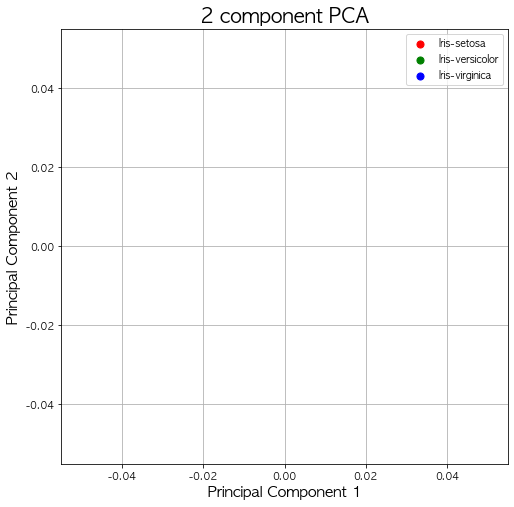

In [6]:
# target, color 지정
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

# 산점도 그래프 출력
plt.figure(figsize = (8, 8))
for target, color in zip(targets,colors):
    plt.scatter(finalDf.loc[finalDf['target'] == target, 'pca_1']
               , finalDf.loc[finalDf['target'] == target, 'pca_2']
               , c = color
               , s = 50)
    
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize=20)
plt.legend(targets)
plt.grid()
plt.show()

1번째 주성분이 설명가능한 분산 값 :  0.72962
2번째 주성분이 설명가능한 분산 값 :  0.22851
2개 주성분이 설명하지 못하는 분산 값 :  0.04187


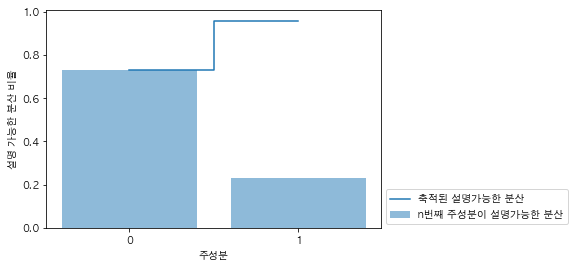

In [7]:
# 설명가능한 분산 (PCA 매서드에서 출력 가능)

# 주성분 개수 설정
n_components = 2
# Instantiate PCA
pca = PCA(n_components=n_components)

# Determine transformed features
pca2_feature = pca.fit_transform(scaled_data)

# explained_variance_ratio를 사용하여 각 주성분이 설명가능한 분산을 지정함
exp_var_pca = pca.explained_variance_ratio_

for i in range(len(exp_var_pca)):
    print(f'{i+1}번째 주성분이 설명가능한 분산 값 : {exp_var_pca[i] : .5f}')
print(f'{n_components}개 주성분이 설명하지 못하는 분산 값 : {1-sum(exp_var_pca) : .5f}')

# explained 값을 cumsum하여 step으로 표시함
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# 시각화
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='n번째 주성분이 설명가능한 분산')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='축적된 설명가능한 분산')
plt.xticks(range(0,len(exp_var_pca)))
plt.ylabel('설명 가능한 분산 비율')
plt.xlabel('주성분')
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

## 참고

- interactive plot
- 3D plot

In [10]:
# interactive plot 출력

# 라이브러리 호출
import plotly.express as px
from sklearn.decomposition import PCA

# feature 지정
feature = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# PCA 기법 반영 (2차원으로 축소) 및 데이터 프레임 형성
pca = PCA(n_components=2)
components = pd.DataFrame(pca.fit_transform(feature))
components.columns = ['pca_1', 'pca_2']

# plotly 도표 생성
fig = px.scatter(components, x='pca_1', y='pca_2', color=data['target'])
fig.show()

In [11]:
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

feature = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(feature)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x=0, y=1, z=2, color=data['target'],
                    title=f'Total Explained Variance: {total_var:.2f}%',
                    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.update_layout(height=500)
fig.show()